In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter as sf
from shapely.geometry import mapping

In [3]:
import route_dynamics.route_elevation.base as base
from route_dynamics.route_visualizer import visualizer as vis

Put the data you want to use into the /data folder.

In [4]:
route_pts = '../data/rt40_pts.shp'

In [5]:
route = gpd.read_file(route_pts)

In [6]:
x = []

for i in route.index:
    
    x.append(i*6)
    

route['length'] = x

In [7]:
route.head()

,Id,ORIG_FID,SHAPE_Leng,Z,ROUTE_NUM,geometry,length
0,0,1,0.441175,260.453505,40,POINT (-122.327137081 47.70168429900008),0
1,0,1,0.441175,260.313710,40,POINT (-122.3271363789257 47.70165989277399),6
2,0,1,0.441175,260.206556,40,POINT (-122.3271455110832 47.70163764078868),12
3,0,1,0.441175,260.048542,40,POINT (-122.3271563518966 47.70161576309354),18
4,0,1,0.441175,259.963559,40,POINT (-122.32716719271 47.7015938853984),24


## Pre-filter

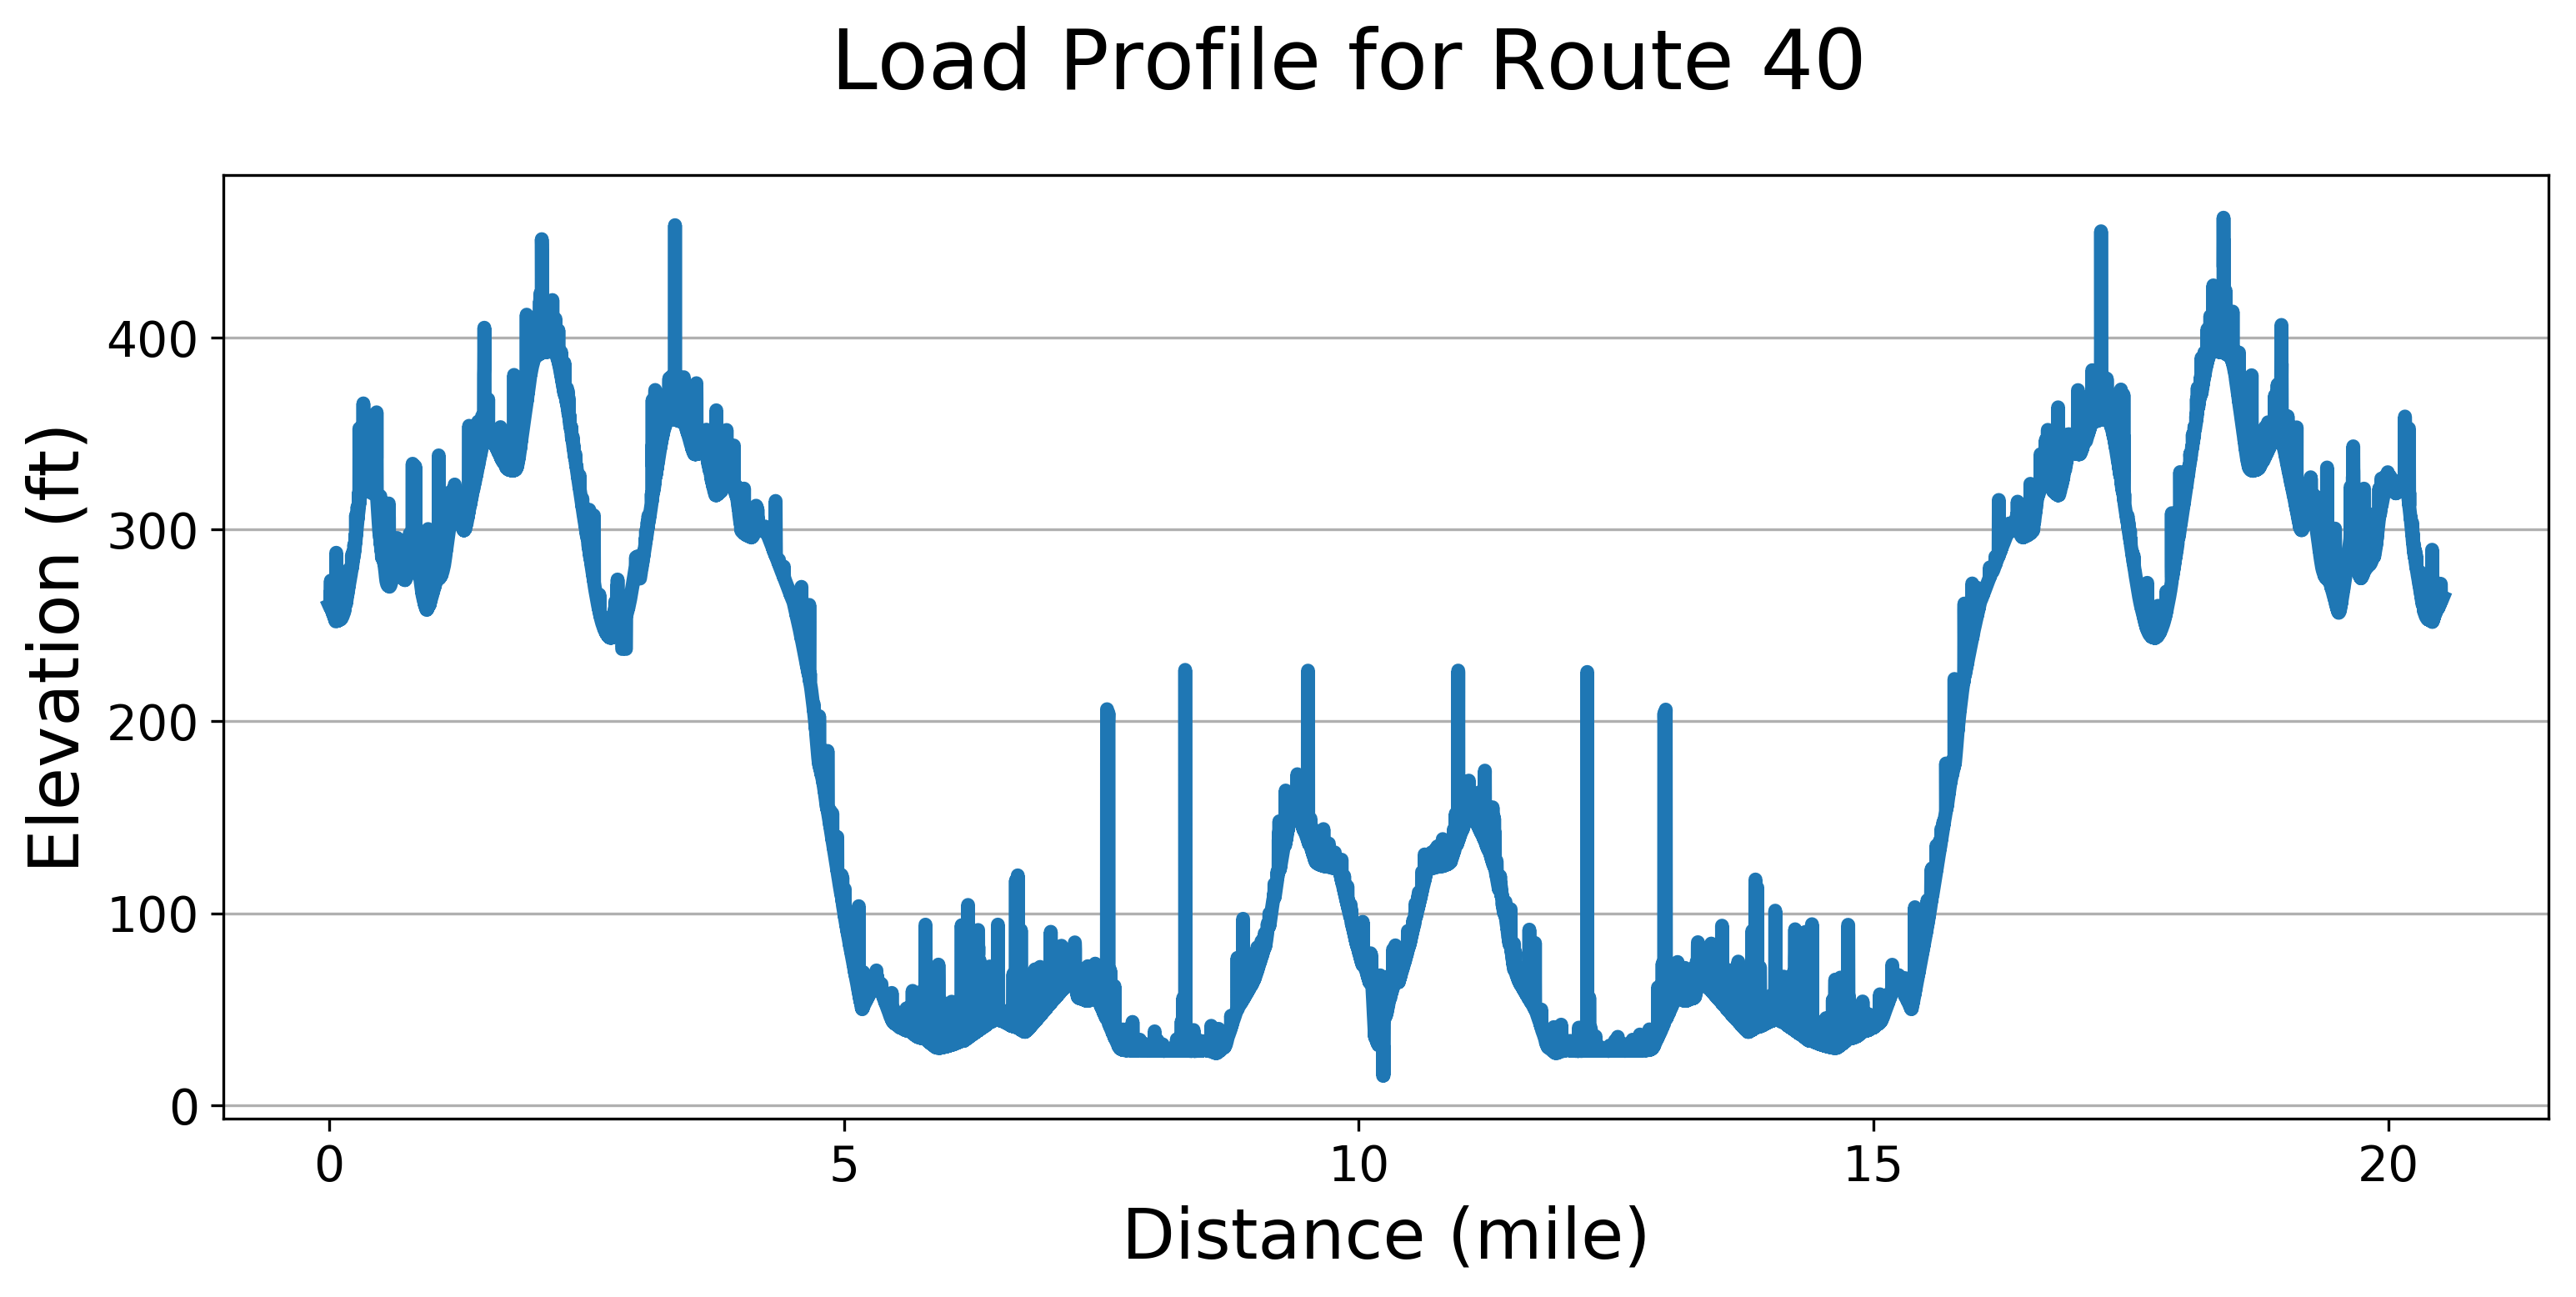

In [8]:
vis.profile_x(route['Z'], route['length'], 40)

In [9]:
out_bound_raw, in_bound_raw = np.split(route['Z'].values, 2)

out_bound2, in_bound2 = np.split(route['length'].values, 2)

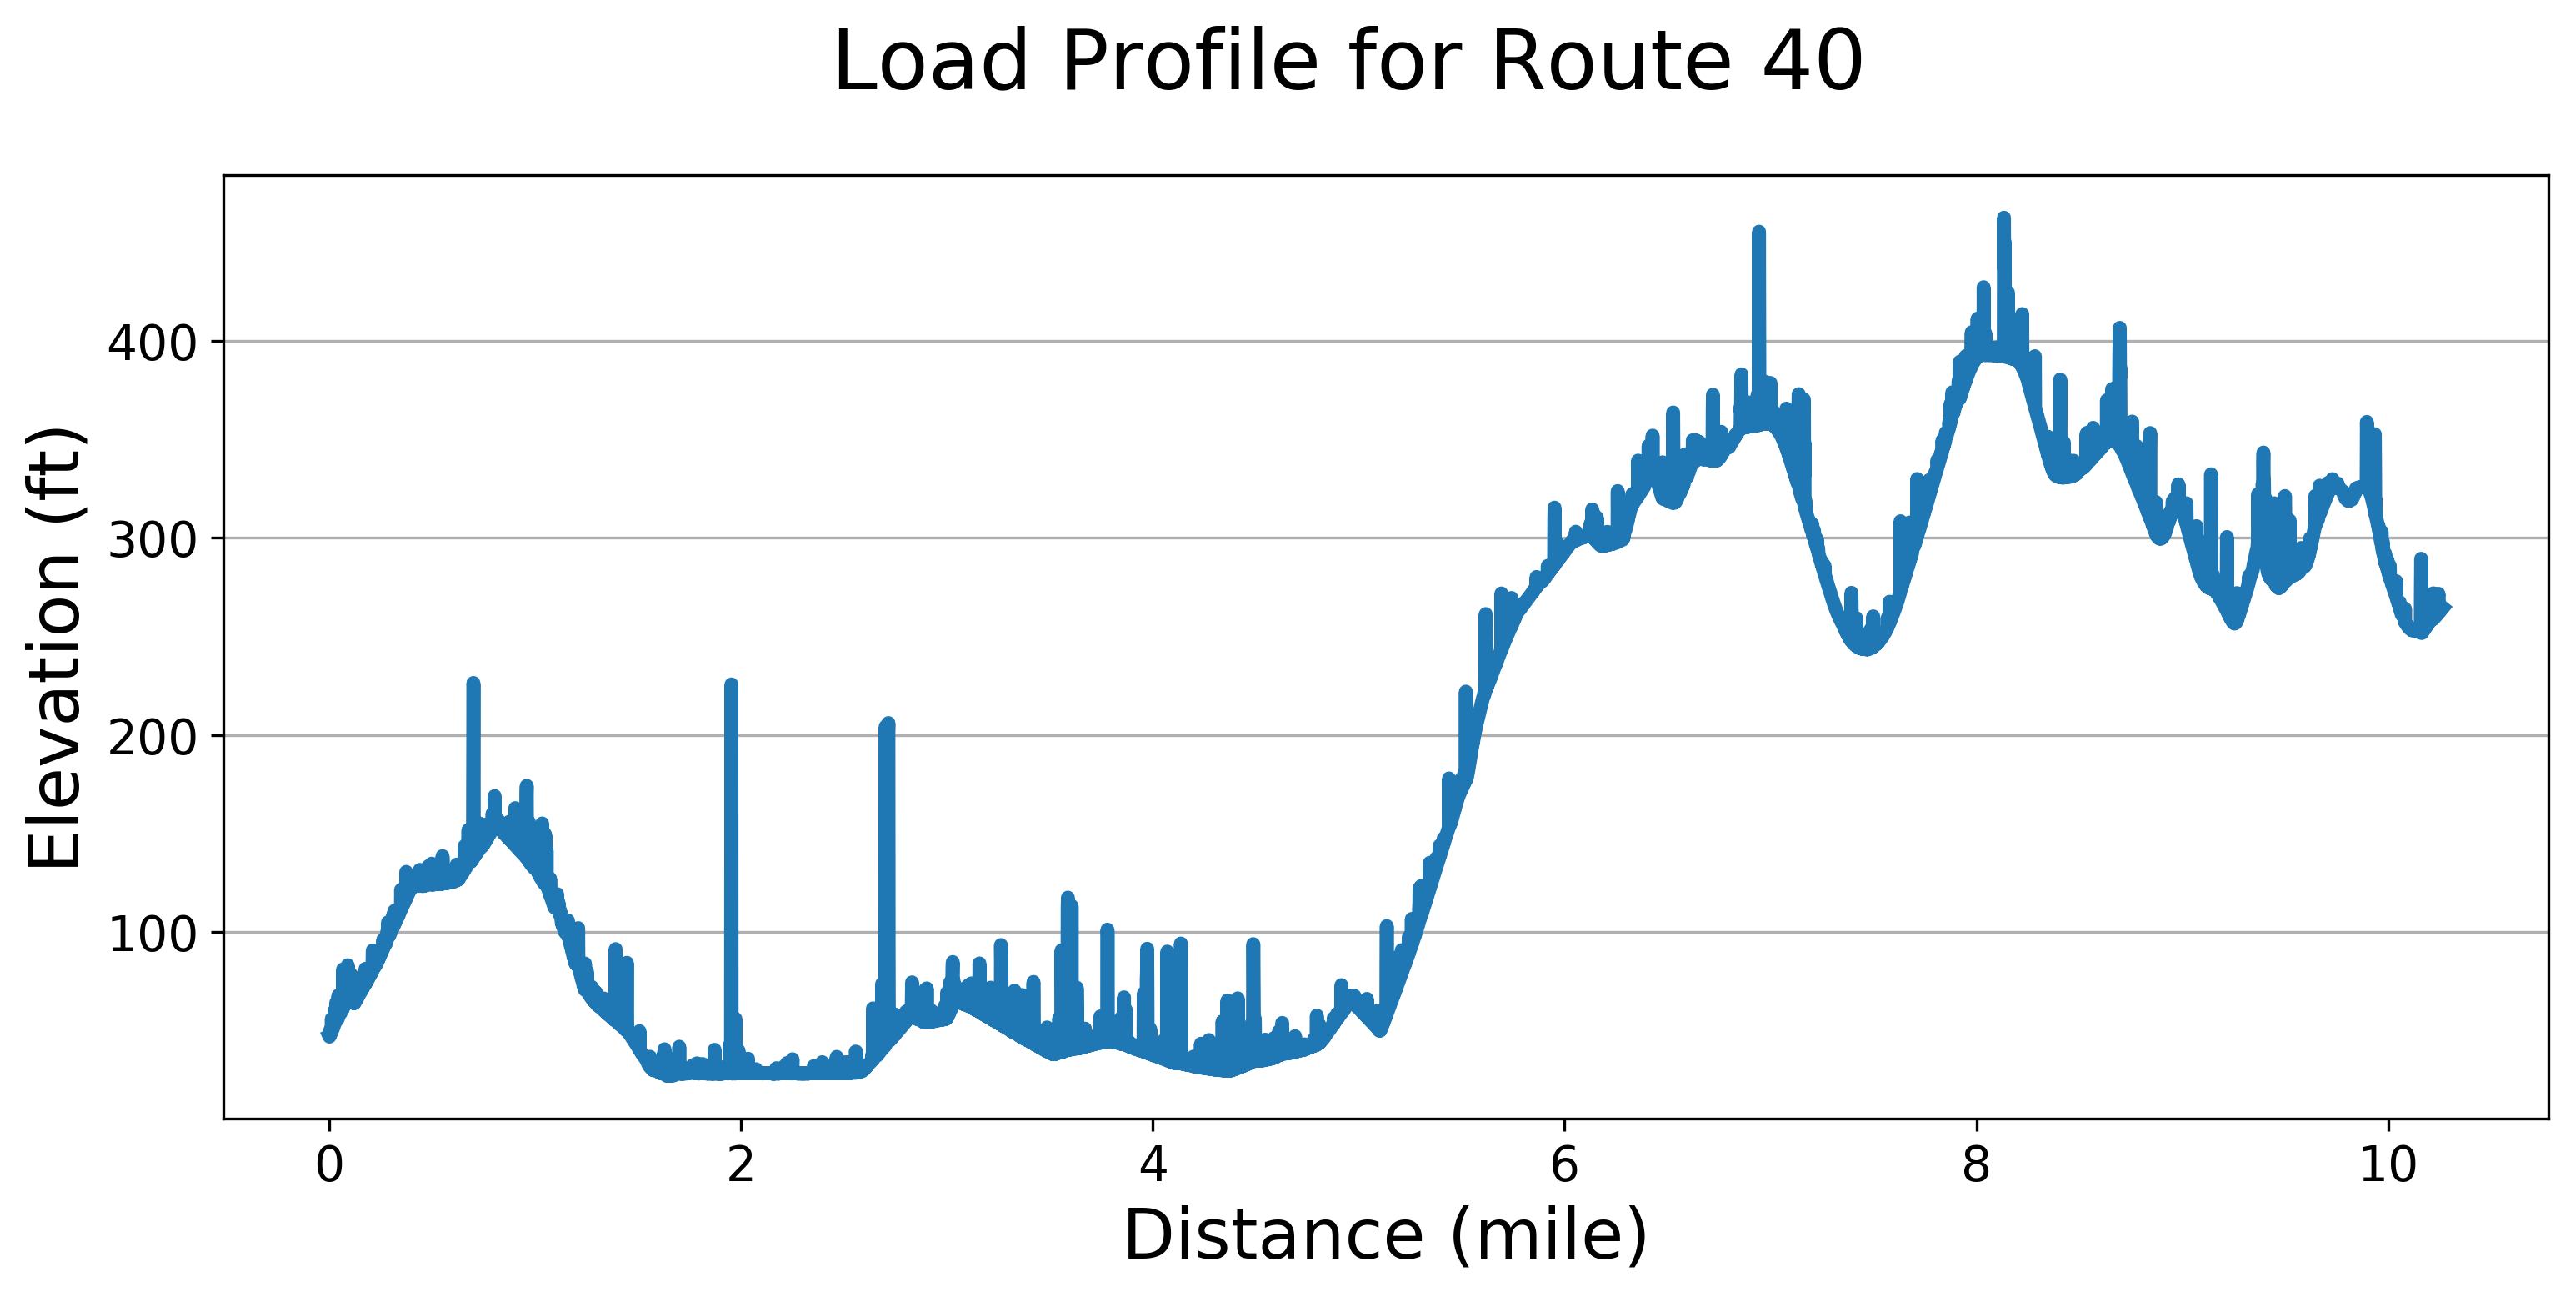

In [10]:
vis.profile_x(in_bound_raw, out_bound2, 40)

## Filter

In [11]:
points = route[('Z')].values


y_new = sf(points, 441, 3,  axis = 0)

In [12]:
out_bound, in_bound = np.split(y_new, 2)

## Post-filter

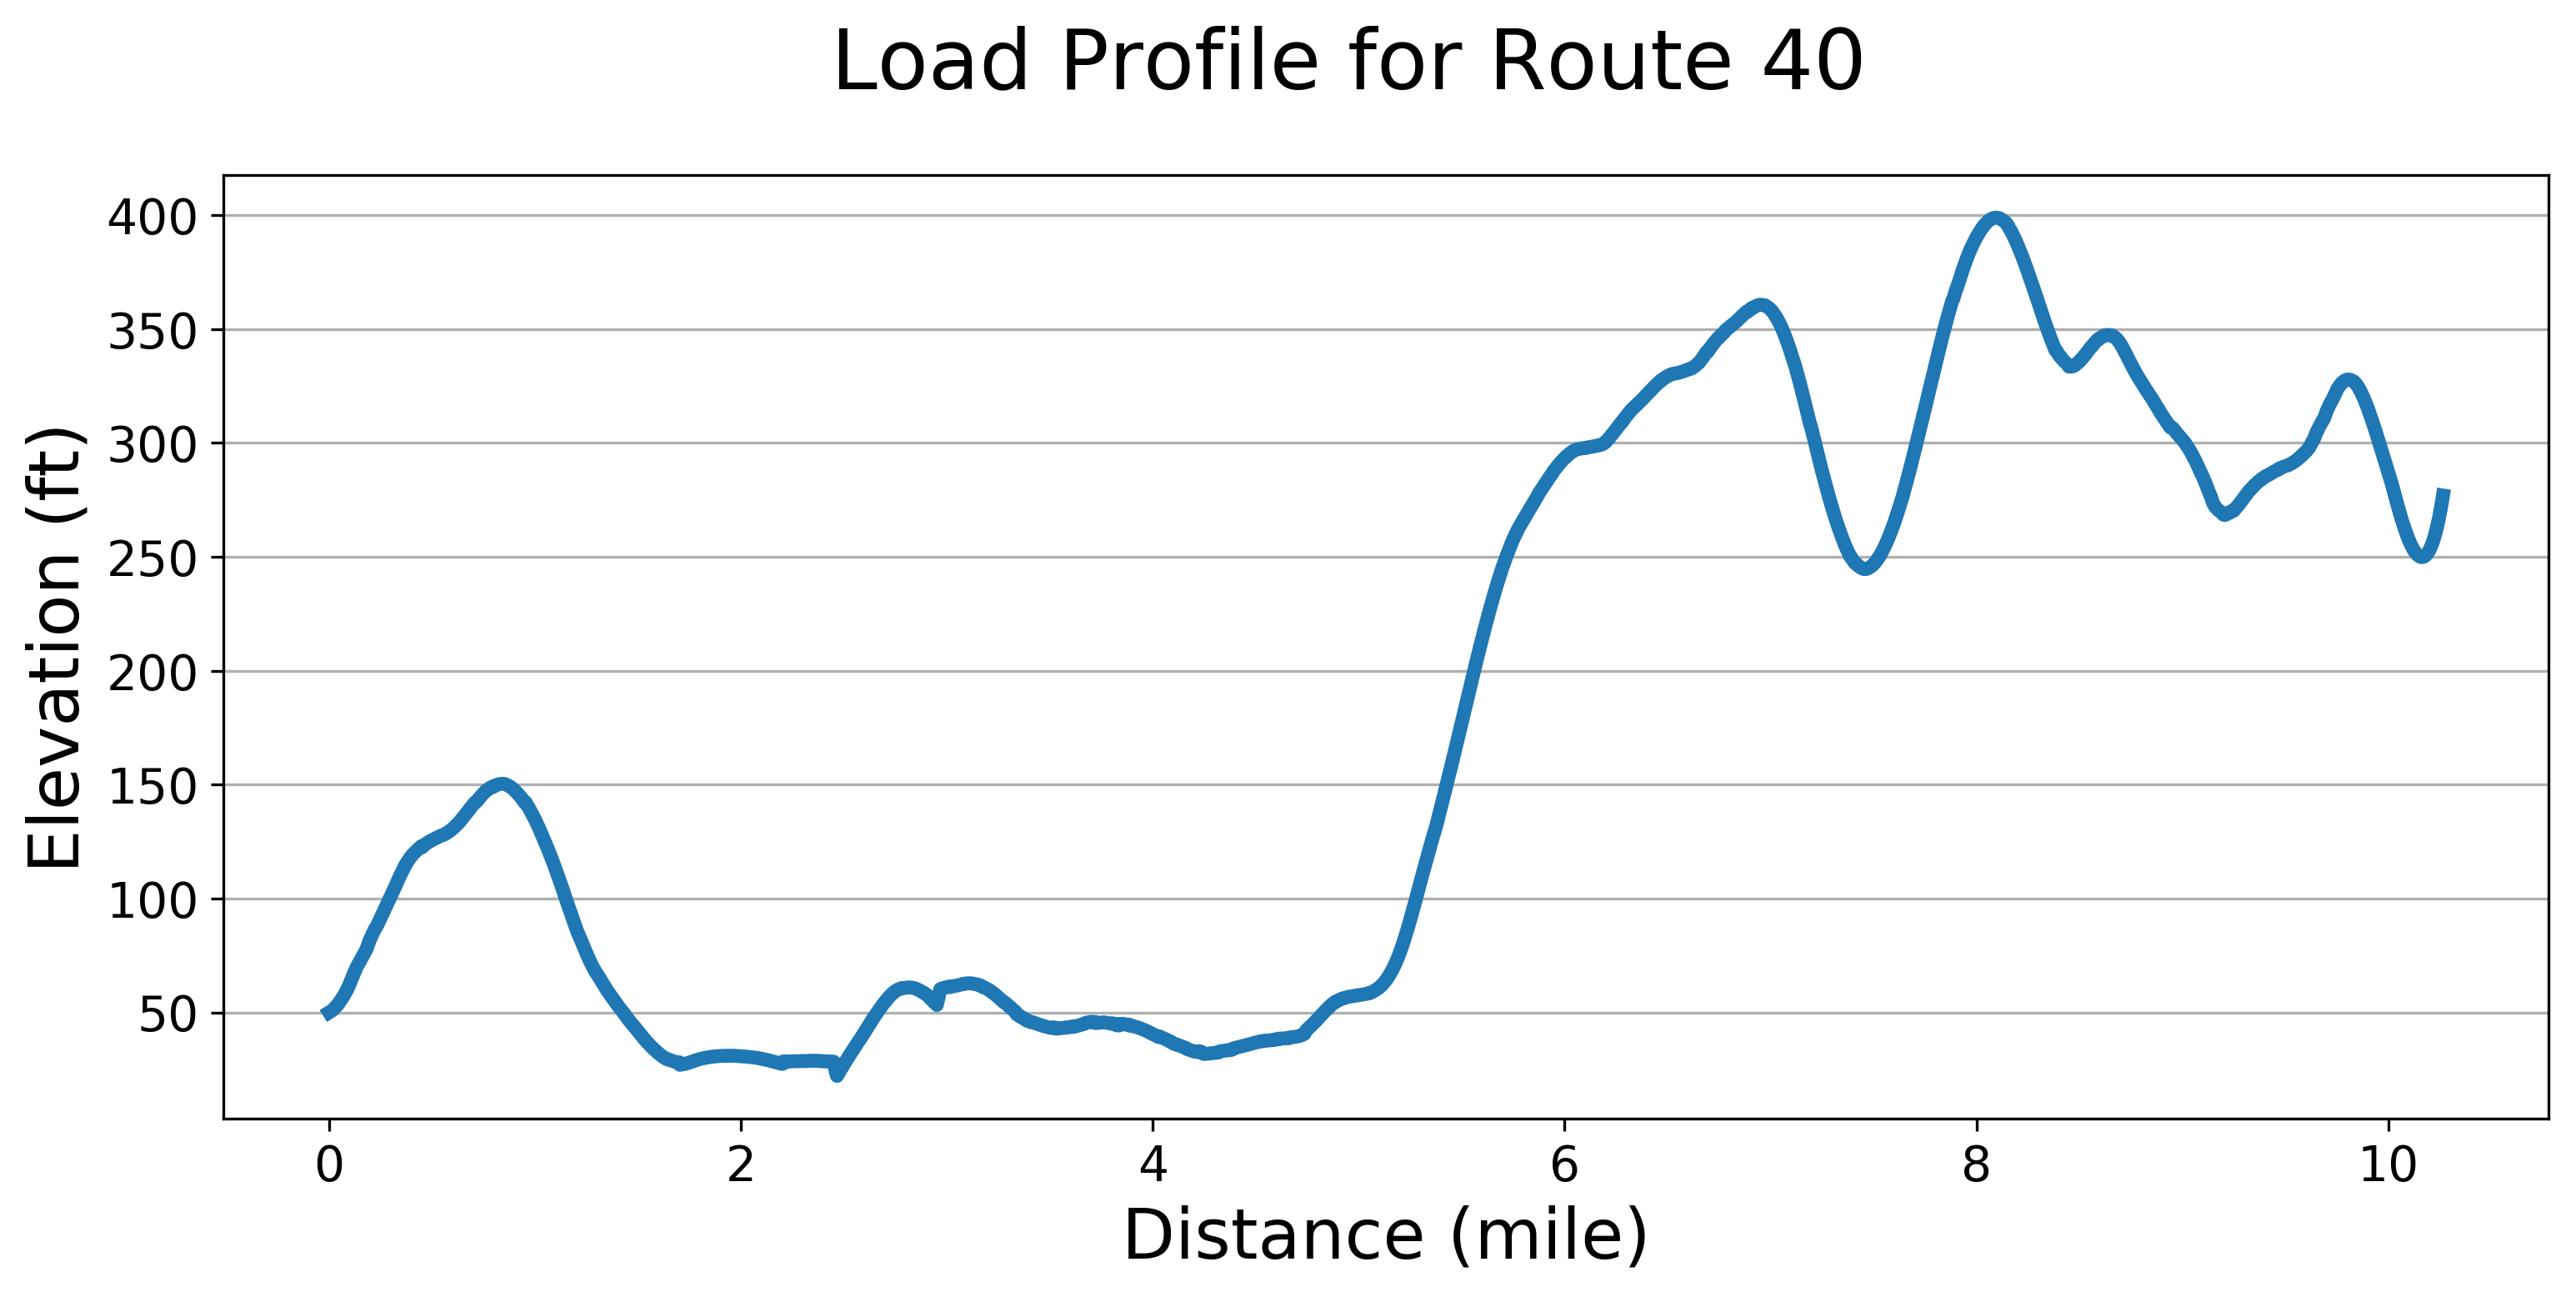

In [13]:
vis.profile_x(in_bound, out_bound2, 40)

Questions: